# D207 Exploratory Data Analysis Performance Assessment

Submitted by William J Townsend, Student ID 003397146, for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA1">Research Question</a></li>
<li><a href="#PartA2">Benefits of Question</a></li>
<li><a href="#Aside">Aside: Data Cleaning</a></li>
<li><a href="#PartA3">Identification of Relevant Variables</a></li>
<li><a href="#PartB1">Analysis of Variables</a></li>
<li><a href="#PartB2">Results of Analysis</a></li> 
<li><a href="#PartB3">Justification of Analysis Technique</a></li> 
<li><a href="#PartC1">Univariate Statistics</a></li>
<li><a href="#PartD1">Bivariate Statistics</a></li>
<li><a href="#PartE1">Hypothesis Test Results</a></li> 
<li><a href="#PartE2">Limitations of Analysis</a></li> 
<li><a href="#PartE3">Recommended Action</a></li>
<li><a href="#PartF">Panopto Recording</a></li>
<li><a href="#PartG">Code References</a></li>
<li><a href="#PartH">Source References</a></li>    
</ul>

<a id='PartA1'></a>
## A1: Research Question
I am using the same dataset I used in D206, and I'm interested in pursuing the same research question that I presented in that class. Specifically, I want to look into the relationship between patients with chronic back pain and hospital readmission. This is an issue that is of interest to me because I do have chronic back pain from some of my past jobs that I've worked, prior to going back to school. In examining this question for the purposes of this study, the research question is "Do patients with chronic back pain have a higher rate of readmission than the rest of the population?" This is demonstrated in relation to the null hypothesis as follows:

$H_{0}: readmission_{backpain} = readmission_{population}$

$H_{1}: readmission_{backpain} \neq readmission_{population}$

I will use an $\alpha$ value of 0.05 (95% certainty). 

<a id='PartA2'></a>
## A2: Benefits of Question 
One's wellness is often related closely to their mobility, and this relationship with wellness likely extends to one's ability to convalesce and recover from a hospitalization. Back pain can be reduce one's mobility significantly, and with it, that person's overall wellness. Such a reduction in one's wellness and ability to recover could lead to poor outcomes of an initial hospitalization, and those outcomes may lead to longer admissions or future readmissions. Finding a relationship could demonstrate the necessity to treat not only the issue directly responsible for the patient's hospitalization, but also the need for treatment of their back pain to help improve their recovery and reduce the likelihood of readmission. This is obviously of chief importance to the individuals who have been hospitalized, but it could also be extremely important to the hospitals themselves, as they seek to reduce their readmission rate. A high readmission rate results in financial costs in the form of both penalties to hospitals for high readmission rates and reduced efficiency (more expensive operations) due to having to treat a patient twice to fix an issue, rather than getting it "right" the first time. 

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<a id='Aside'></a>
## Aside: Data Cleaning

It is worth noting that while this data is "clean", being stored in a CSV does cause some issues that were previously addressed when I used this same dataset in D206. For example, zip codes are stored as an int64 and may incorrectly be assumed to be a quantitative type of data as a result, when they should actually be stored as strings and are thus qualitative data. Similarly, many of the variables are stored as strings rather than as booleans or categorical types, which would be more efficient and impact how the data may be handled. As such, I'm going to reapply some of the code that I used in my D206 project to get this dataframe put together properly. 

In [3]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")
# Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : True, "No" : False}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
# Establish ordered categorical datatype structure ("1" > "2" > ... > "7" > "8") for survey response columns
survey_scores = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)

<a id='PartA3'></a>
## A3: Identification of Relevant Variables 

The relevant variables for this research question are:

- ReAdmis (qualitative), row 1 example: True <br>
A binary variable, this column indicates whether or not the patient was readmitted within 1 month of release.

- BackPain (qualitative), row 1 example: True <br>
A binary variable, this column indicates whether or not the patient has chronic back pain.

<a id='PartB1'></a>
## B1: Analysis of Variables 

There are multiple variations of chi-square tests that can be used on this data, and the chi-square test for independence can be used to handle a contingency table to examine proportions of two different groups ([WGU Courseware Resources](https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/EbIWOqJp0oJFrByVqCO5wfgB7LHdWLxGgzYyHXd2nuIV2Q?e=PrgdzD)). The [ScyPi documentation explains that the chi2_contingency function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can be used to generate this Chi-square test for independence. 

In [4]:
# Generate a table with ratios of BackPain/no BackPain patients vs ReAdmits/non-ReAdmits
table = pd.crosstab(df.ReAdmis, df.BackPain)
print(table)

BackPain  False  True 
ReAdmis               
False      3758   2573
True       2128   1541


In [5]:
chi = stats.chi2_contingency(table)
print(chi)
print(f"The p-value, or probability under the null hypothesis of obtaining a result as extreme as the one observed, is {chi[1]:.3}.")

(1.7166153073233095, 0.1901293128457823, 1, array([[3726.4266, 2604.5734],
       [2159.5734, 1509.4266]]))
The p-value, or probability under the null hypothesis of obtaining a result as extreme as the one observed, is 0.19.


<a id='PartB2'></a>
## B2: Results of Analysis 

This chi-square test for independence returned a p-value of approximately 0.19. This value is the probability of finding a result as the one observed, under the null hypothesis. A p-value smaller than the chosen alpha level indicates that the result is statistically significant from the null hypothesis and that a meaningful difference has been found between distributions. I established an alpha of 0.05, which would indicate 95% certainty that any p-value less than 0.05 was statistically significant. The resulting p-value of 0.19 is **not** below the alpha value of 0.05. As a result, we accept the null hypothesis. This means that we conclude that the distribution of readmitted patients with chronic back pain is not statistically significant from the distribution of readmitted patients without chronic back pain. 

<a id='PartB3'></a>
## B3: Justification of Analysis Technique 

This chi-square test for independence was necessary because of the nature of the data that I was working with, and the question that I was looking to answer. I wanted to know if the proportion of patients readmitted who experience chronic back pain was statistically significantly difference from those readmitted without chronic back pain. A chi-square test for independence can be used to examine if two proportions are independent from each other or not, as it was used here. While there are other tests that can be used to make similar determinations, the chi-square was the appropriate choice because this data was both discrete (concrete, whole numbers which cannot be measured more precisely) and categorical in nature. 

<a id='PartC1'></a>
## C1: Univariate Statistics 

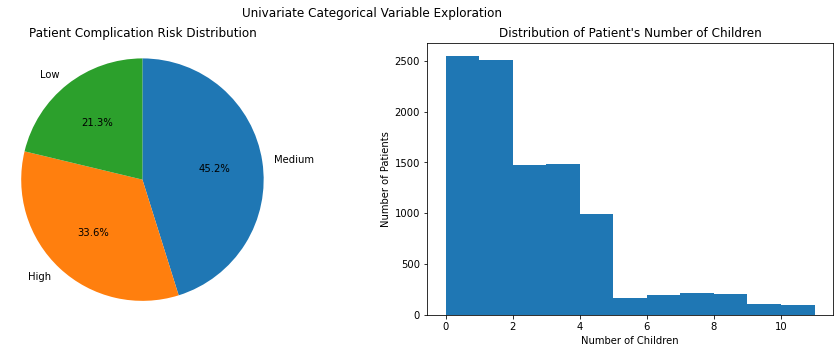

In [6]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Categorical Variable Exploration")

# LEFT plot: Univariate exploration of categorical Complication_risk variable
plt.subplot(1, 2, 1)
plt.title("Patient Complication Risk Distribution")
comp_risk_counts = df["Complication_risk"].value_counts()
comp_risk_labels = ["Medium", "High", "Low"]
plt.pie(comp_risk_counts, labels=comp_risk_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# RIGHT plot: Univariate exploration of categorical Children variable
plt.subplot(1, 2, 2)
plt.title("Distribution of Patient's Number of Children")
bins = np.arange(0, df["Children"].max()+2, 1)
plt.hist(data=df, x = "Children", bins=bins)
plt.xlabel("Number of Children")
plt.ylabel("Number of Patients");

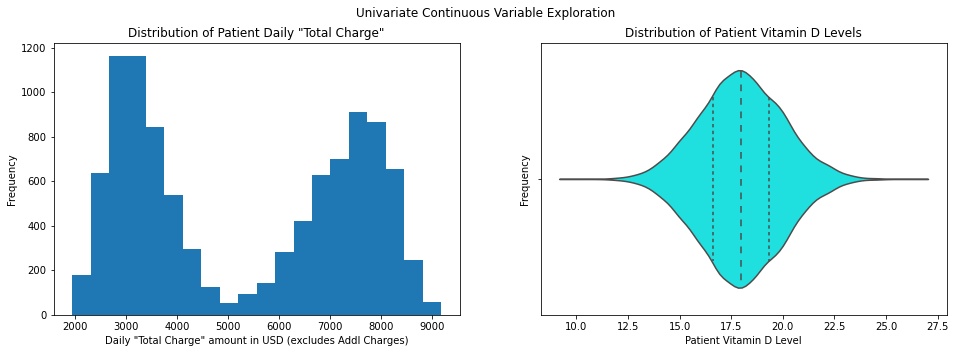

In [7]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Continuous Variable Exploration")

# LEFT plot: Univariate exploration of continuous TotalCharge variable
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Daily "Total Charge"')
plt.hist(data=df, x="TotalCharge", bins = 20)
plt.xlabel('Daily "Total Charge" amount in USD (excludes Addl Charges)')
plt.ylabel("Frequency");

# RIGHT plot: Univariate exploration of continuous VitD_levels variable
plt.subplot(1, 2, 2)
plt.title("Distribution of Patient Vitamin D Levels")
sns.violinplot(data=df, x="VitD_levels", color="cyan", inner="quartile")
plt.xlabel("Patient Vitamin D Level")
plt.ylabel("Frequency");

Each of the above plots shows a distribution of a variable from the provided dataset. These plots cover 4 variables:
- Complication_risk (categorical)
- Children (categorical)
- TotalCharge (continuous)
- VitD_level (continuous)

In [8]:
df.Complication_risk.value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [9]:
df.Children.value_counts().sort_index()

0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: Children, dtype: int64

In [10]:
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [11]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

The distribution of patient's children was a little surprising to me in how it did not slope downwards with increasing numbers of children. Instead, it has 4 distinct plateaus - 0 & 1 children, then 2 & 3 children, then 4 children, and then 5 - 10 children all have similar frequencies. While the lack of a smooth slope is certainly impacted by the discrete nature of the data and the histogram itself, I would have expected a consistent progressive decline above 2 or 3 children. 

The other plot that stands out to me is the misleadingly named "TotalCharge". This variable does not *actually* represent the total amount the patient was charged for their hospitalization, as would be intuitively expected. This value instead represents the total amount charged to the patient, minus any "additional charges" (in the Additonal_charges column), averaged on a per-day basis across the patient's stay. I would've expected this to be relatively normal, likely with a long tail because of outlier hospitalizations racking up huge costs. For this distribution to instead have two separate peaks was unexpected. I would be curious to check with someone with domain knowledge if there is a reason this might be the case. 

<a id='PartD1'></a>
## D1: Bivariate Statistics 

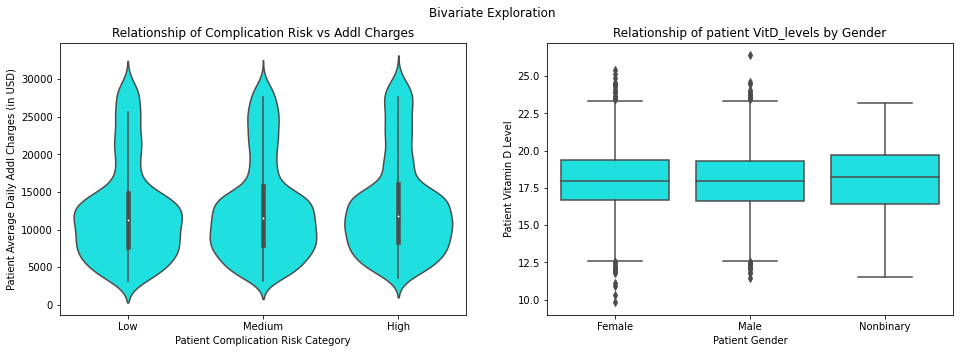

In [12]:
plt.figure(figsize = [16,5])
plt.suptitle("Bivariate Exploration")

# LEFT plot: Bivariate exploration of Complication_risk (categorical) & Additional_charges (continuous)
plt.subplot(1, 2, 1)
plt.title('Relationship of Complication Risk vs Addl Charges')
plot_order = ["Low", "Medium", "High"]
sns.violinplot(data= df, x= "Complication_risk", y= "Additional_charges", color= "cyan", order=plot_order)
plt.xlabel('Patient Complication Risk Category')
plt.ylabel("Patient Average Daily Addl Charges (in USD)");

# RIGHT plot: Bivariate exploration of Gender (categorical) & VitD_levels (continuous)
plt.subplot(1, 2, 2)
plt.title("Relationship of patient VitD_levels by Gender")
sns.boxplot(data=df, x= "Gender", y = "VitD_levels", color= "cyan")
plt.xlabel("Patient Gender")
plt.ylabel("Patient Vitamin D Level");

Each of the above plots shows the relationship between two variables:
- Complication_risk (categorical) vs Additional_charges (continuous)
- VitD_levels (continuous) vs Gender (categorical)

In [13]:
df.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [14]:
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

For the left-hand plot of complication risk vs additional charges, we do see very slightly different shapes in the violin plots. Higher complication risks seem to have a slightly amount of additional charges, as indicated by the slightly fuller top of the fullest part of the high-risk plot compared to the medium- and low-risk plots. This is further indicated by the slightly higher beginning and ending of the high-risk plot compared to the medium- and low-risk plots, though this is difficult to see. 

The right hand plot of patient gender vs Vitamin D levels shows female patients having a wider range of Vitamin D levels compared to male patients, though this is mostly evident in the outliers. The wider ranges for nonbinary patients, both overall and interquartile, is likely a result of the small sample size of nonbinary patients relative to both male and female patients.

<a id='PartE1'></a>
## E1: Hypothesis Test Results 

$H_{0}: readmission_{backpain} = readmission_{population}$

$H_{1}: readmission_{backpain} \neq readmission_{population}$

As mentioned above, I set an $\alpha\$ of 0.05 (95% certainty) in testing the null hypothesis (no difference in readmission between chronic back pain sufferers and the rest of the population) against the alternative hypothesis (that there would be a difference). The returned p-value from the chi-square test was ~0.19. If the p-value were below 0.05 (the alpha value), this would indicate with 95% certainty that the rate of readmission for patients with chronic back pain was statistically significant from the rate of readmission for non-back pain patients. Because the p-value is not below alpha (0.19 > 0.05), this is not the case and the readmission rate seems to be not statistically different for both groups.

This means that the conclusion of our analysis is that we accept the null hypothesis ($H_{0}$), finding that readmission of patients with back pain is equal to readmission of patients without back pain. 

<a id='PartE2'></a>
## E2: Limitations of Analysis 

This analysis is based only on 10,000 total records, broken out into a 2 x 2 contingency table based on whether or not the patient was readmitted and whether or not the patient has chronic back pain. These four groups ranged from 1541 patients (has back pain and has been readmitted) to 3758 patients (no back pain and no readmission), summing up to 10,000 total patients. This doesn't seem like a particularly large sample, especially for a nationwide network of hospitals. A larger and more robust sample might provide some different results because it could reduce the standard deviation of any distribution of readmission rates. 

The core idea behind my suspicion that chronic back pain led to decreased mobility and wellness, which would lead to increased hospital readmission seemed to make intuitive sense, though it was not borne out in this data. One idea that occurs to me is that because all hospital patients have *something* wrong (otherwise they would not be in the hospital at all), that perhaps this idea applies more particularly to hospitalization in the first place, but amongst a population of people all of whom have at least one problem negatively impacting their wellness, that this problem might be "small potatoes" amongst that subset. Put simply, this is the possibility that chronic back pain sufferers are more likely to end up hospitalized in the first place than the rest of the overall population, but once hospitalized and placed into a sample of people who *all* have problems negatively impacting their health, this particular problem is smaller in magnitude than many of the other different problems experienced by others within the same sample. This would require further study and cannot be surmised from this particular data set, but it does strike me as a conclusion that would not be particularly surprising. 

<a id='PartE3'></a>
## E3: Recommended Action

Given that my analysis led to accepting the null hypothesis, there isn't really anything to recommend in terms of healthcare outcomes or reducing readmission rates. There is possibly an argument that this conclusion should lead to ceasing to collect/record this data, but that presumes that the only thing we might be interested in is back pain vs readmission, where back pain may be relevant to another factor or may combine with another variable(s) to more meaningfully impact readmission. I believe that the potential benefits of continuing to collect and record this data is worthwhile. 

<a id='PartF'></a>
## F: Panopto Recording 

My presentation of this performance assessment [can be viewed here, via Panopto.](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=096e1f5b-ae01-4606-8c82-af3c015d1e2b)

<a id='PartG'></a>
## G: Code References 
[ScyPi chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) was used for assistance with the SciPy package and generating the Chi-square test for independence in Python.

[William Townsend D206 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c933f45d-fa5a-4fc9-a761-af340042a867) was used for the code to clean up columns in the dataset. 

<a id='PartH'></a>
## H: Source References 
[WGU Courseware Resources](https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/EbIWOqJp0oJFrByVqCO5wfgB7LHdWLxGgzYyHXd2nuIV2Q?e=PrgdzD) pushed me in the right direction on how to get a chi-square test done on a contingency table. 